In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris

import umap

In [17]:
# Load Iris dataset
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

In [18]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
# Apply UMAP

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

/opt/anaconda3/envs/masterxml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/masterxml/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [20]:
# Create a DataFrame for visualization

umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['target'] = y
umap_df['target_name'] = [target_names[i] for i in y]

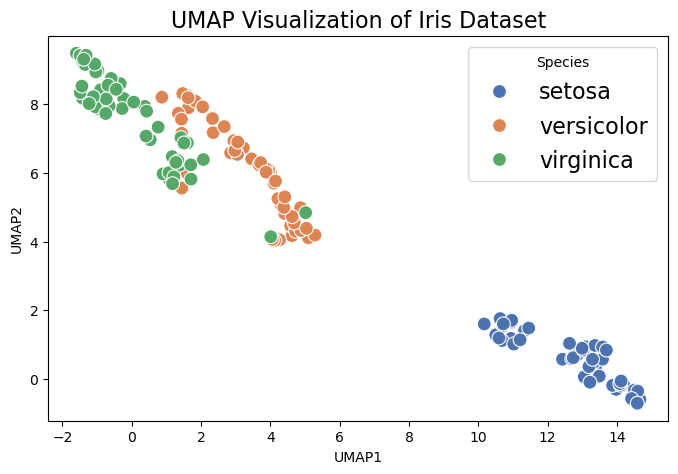

In [21]:
# Plot UMAP results

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='UMAP1', y='UMAP2', hue='target_name', palette ='deep', data=umap_df, s=100
)

plt.title("UMAP Visualization of Iris Dataset", fontsize=16)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")

plt.legend(title='Species', fontsize=16)
plt.show()